In [2]:
import qiskit 
from qiskit import *
from qiskit import IBMQ
IBMQ.save_account('(INSERT USER IBMQ TOKEN HERE)', overwrite=True)
IBMQ.load_account()
provider = IBMQ.get_provider('ibm-q')

In [3]:
#Imports that work.  Assuming everything else has been ported to Qiskit Standard
from numpy import identity as eye, trace, kron
import numpy as np
import math
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, \
    BasicAer, execute, IBMQ, __qiskit_version__
from qiskit.providers.aer import noise
from qiskit.quantum_info import Pauli, state_fidelity, basis_state, \
    process_fidelity, random_state, projector
from qiskit.tools.visualization import plot_histogram
import glob
import PIL 

In [4]:
#Simulators
statevec = BasicAer.get_backend('statevector_simulator')
unitary = BasicAer.get_backend('unitary_simulator')
qasm = BasicAer.get_backend('qasm_simulator')

In [6]:
#Setting up Acutal quantum Backends.  Missing ibmqx4.  

try:
    ibmqx2 = provider.get_backend('ibmqx2')
except:
    IBMQ.load_account()
    ibmqx2 = provider.get_backend('ibmqx2')

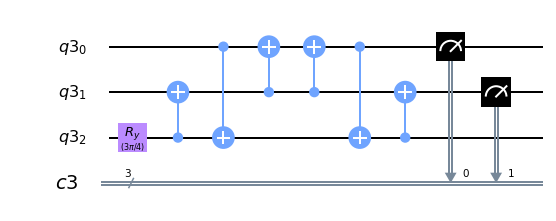

In [11]:
# Identity

#Setup Quantum System
q = QuantumRegister(3)
c = ClassicalRegister(3)
qc = QuantumCircuit(q, c)

#I think that this is encoding everything using hadimar and control x gates

# encode
qc.ry(math.pi * 3/4, q[2])
qc.cx(q[2],q[1])
qc.cx(q[0], q[2])
qc.cx(q[1], q[0])
qc.cx(q[1],q[0])
qc.cx(q[0], q[2])
qc.cx(q[2],q[1])
qc.measure(q[0], c[0])
qc.measure(q[1], c[1])
qc.draw()
qc.draw(output="mpl")

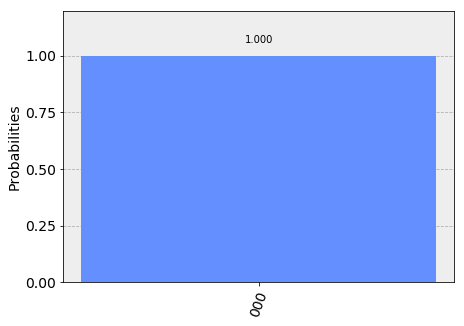

In [12]:
#Simulate
simulator = Aer.get_backend('qasm_simulator')
result = execute(qc, backend=simulator).result()
plot_histogram(result.get_counts(qc))

In [13]:
#Run it on a real backend

num_qubits = 3

from qiskit.providers.ibmq import least_busy #Select the least busy device
from qiskit.tools.monitor import job_monitor
possible_devices = provider.backends(filters=lambda x: 
                                     x.configuration().n_qubits >= num_qubits
                                       and 
                                     x.configuration().simulator == False)
qcomp = least_busy(possible_devices)
print(qcomp)

ibmq_burlington


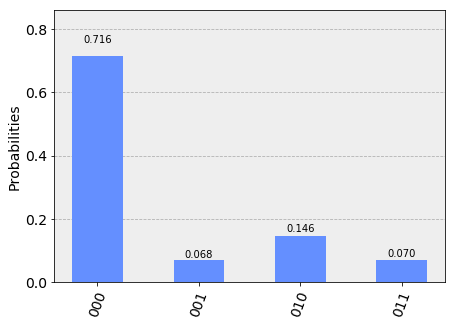

In [19]:
#device: ibmq_burlington
job = execute(qc, backend=qcomp)
result = job.result()
plot_histogram(result.get_counts(qc))

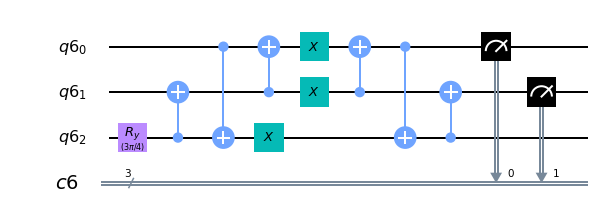

In [16]:
# X-error

#Setup Quantum System
q2 = QuantumRegister(3)
c2 = ClassicalRegister(3)
qc2 = QuantumCircuit(q2, c2)

#I think that this is encoding everything using hadimar and control x gates

# encode
qc2.ry(math.pi * 3/4, q2[2])
qc2.cx(q2[2],q2[1])
qc2.cx(q2[0], q2[2])
qc2.cx(q2[1], q2[0])
qc2.x(q2)
qc2.cx(q2[1],q2[0])
qc2.cx(q2[0], q2[2])
qc2.cx(q2[2],q2[1])
qc2.measure(q2[0], c2[0])
qc2.measure(q2[1], c2[1])
qc2.draw()
qc2.draw(output="mpl")

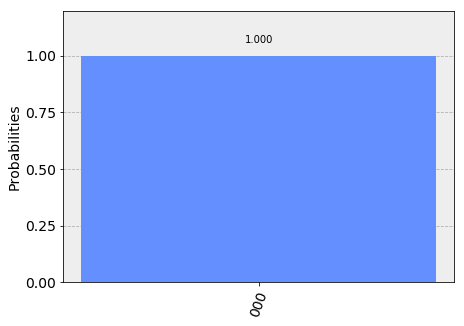

In [20]:
#Simulate
simulator = Aer.get_backend('qasm_simulator')
result = execute(qc2, backend=simulator).result()
plot_histogram(result.get_counts(qc2))

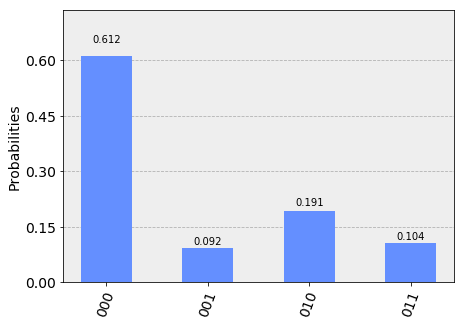

In [21]:
#device: ibmq_burlington
job = execute(qc2, backend=qcomp)
result = job.result()
plot_histogram(result.get_counts(qc2))

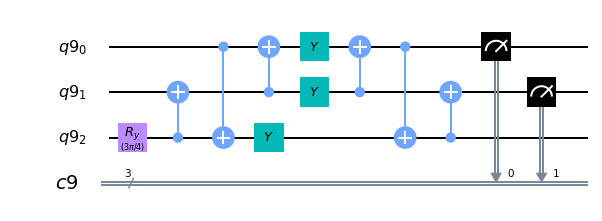

In [29]:
#Y-error: 

q3_y = QuantumRegister(3)
c3_y = ClassicalRegister(3)
qc3_y = QuantumCircuit(q3_y, c3_y)

#I think that this is encoding everything using hadimar and control x gates

# encode
qc3_y.ry(math.pi * 3/4, q3_y[2])
qc3_y.cx(q3_y[2],q3_y[1])
qc3_y.cx(q3_y[0], q3_y[2])
qc3_y.cx(q3_y[1], q3_y[0])
qc3_y.y(q3_y)
qc3_y.cx(q3_y[1],q3_y[0])
qc3_y.cx(q3_y[0], q3_y[2])
qc3_y.cx(q3_y[2],q3_y[1])
qc3_y.measure(q3_y[0], c3_y[0])
qc3_y.measure(q3_y[1], c3_y[1])
qc3_y.draw()
qc3_y.draw(output="mpl")

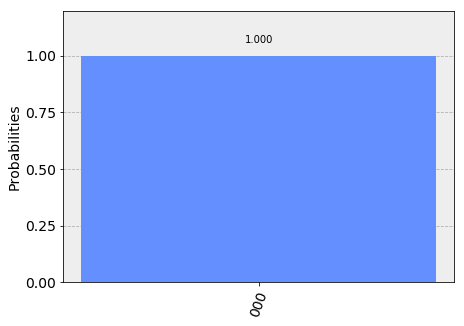

In [30]:
#Simulate using Aer
simulator = Aer.get_backend('qasm_simulator')
result = execute(qc3_y, backend=simulator).result()
#Plot the result
from qiskit.visualization import plot_histogram
plot_histogram(result.get_counts(qc3_y))

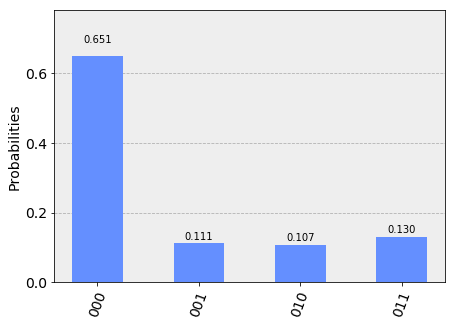

In [31]:
#device: ibmq_burlington
job = execute(qc3_y, backend=qcomp)
result = job.result()
plot_histogram(result.get_counts(qc3_y))

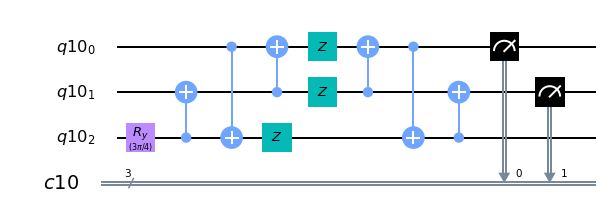

In [32]:
#Z-error

#Setup Quantum System
q3 = QuantumRegister(3)
c3 = ClassicalRegister(3)
qc3 = QuantumCircuit(q3, c3)

#I think that this is encoding everything using hadimar and control x gates

# encode
qc3.ry(math.pi * 3/4, q3[2])
qc3.cx(q3[2],q3[1])
qc3.cx(q3[0], q3[2])
qc3.cx(q3[1], q3[0])
qc3.z(q3)
qc3.cx(q3[1],q3[0])
qc3.cx(q3[0], q3[2])
qc3.cx(q3[2],q3[1])
qc3.measure(q3[0], c3[0])
qc3.measure(q3[1], c3[1])
qc3.draw()
qc3.draw(output="mpl")

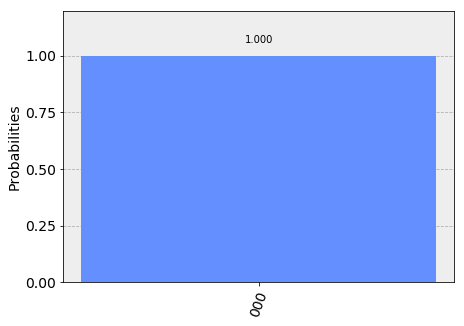

In [33]:
#Simulate using Aer
simulator = Aer.get_backend('qasm_simulator')
result = execute(qc3, backend=simulator).result()
#Plot the result
from qiskit.visualization import plot_histogram
plot_histogram(result.get_counts(qc3))

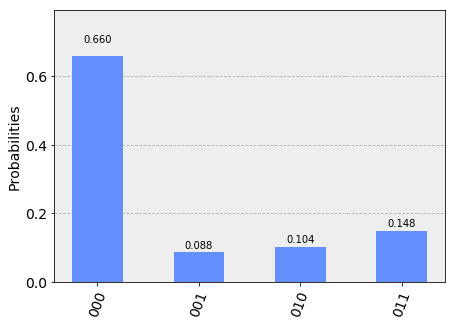

In [34]:
#device: ibmq_burlington
job = execute(qc3, backend=qcomp)
result = job.result()
plot_histogram(result.get_counts(qc3))